In [133]:
import numpy as np
import control as ctrl
import matplotlib.pyplot as plt

In [145]:
# Plant Parameters
Vg = 15          # Input voltage (V)
D = 0.4          # Steady-state duty ratio
L = 2e-3         # Inductance (H)
C = 10e-6        # Capacitance (F)
R = 100          # Load resistance (ohms)

In [146]:
# state space matrices of Large-Signal (Steady-State) Model
As = np.array([[0, -(1 - D) / L],
               [(1 - D) / C, -1 / (R * C)]])
Bs = np.array([[1 / L, 0, 0],
               [0, -1 / C, 0]])
Cs = np.array([[0, 1],
               [1, 0]])
Ds = np.zeros((2, 3))

print("Large-Signal (Steady-State) Model Matrices:\n")
print("As =\n", As)
print("\nBs =\n", Bs)
print("\nCs =\n", Cs)
print("\nDs =\n", Ds)

Large-Signal (Steady-State) Model Matrices:

As =
 [[    0.  -300.]
 [60000. -1000.]]

Bs =
 [[    500.       0.       0.]
 [      0. -100000.       0.]]

Cs =
 [[0 1]
 [1 0]]

Ds =
 [[0. 0. 0.]
 [0. 0. 0.]]


In [147]:
# state space matrices of Steady-State Outputs
Vo = -Cs[0, :] @ np.linalg.inv(As) @ Bs[:, 0] * Vg
Ig = -Cs[1, :] @ np.linalg.inv(As) @ Bs[:, 0] * Vg
IL = Ig

print(f"Steady-state output voltage, Vo = {Vo:.3f} V")
print(f"Steady-state input current, IL = Ig = {IL:.3f} A")

Steady-state output voltage, Vo = 25.000 V
Steady-state input current, IL = Ig = 0.417 A


In [148]:
# Small-Signal Model
a = np.array([[0, -(1 - D) / L],
              [(1 - D) / C, -1 / (R * C)]])
b = np.array([[1 / L, 0, Vo / L],
              [0, -1 / C, -IL / C]])
c = np.array([[0, 1]])
d = np.array([[0, 0, 0]])

print("\nSmall-Signal Model Matrices:\n")
print("a =\n", a)
print("\nb =\n", b)
print("\nc =\n", c)
print("\nd =\n", d)


Small-Signal Model Matrices:

a =
 [[    0.  -300.]
 [60000. -1000.]]

b =
 [[    500.               0.           12500.        ]
 [      0.         -100000.          -41666.66666667]]

c =
 [[0 1]]

d =
 [[0 0 0]]


In [149]:
# Transfer Function: Vo/d(s)
sys_ss = ctrl.ss(a, b[:, 2], c, 0)
TFb = ctrl.tf(sys_ss)

print("\nTransfer Function (Vo/d(s)):")
print(TFb)


Transfer Function (Vo/d(s)):
<TransferFunction>: sys[106]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  -4.167e+04 s + 7.5e+08
  ----------------------
  s^2 + 1000 s + 1.8e+07


Text(0.5, 1.0, 'Pole-Zero Map of Transfer Function Vo/d(s)')

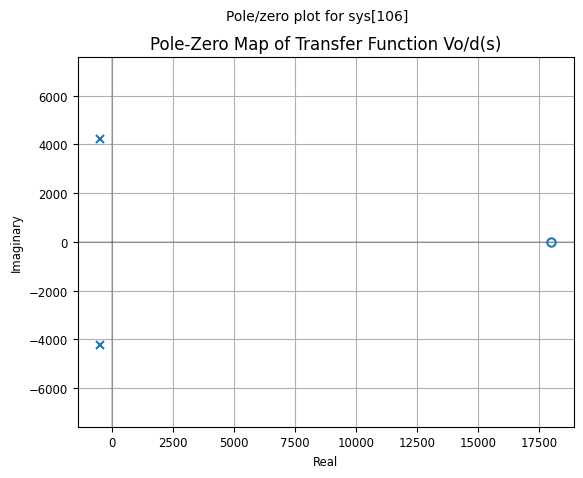

In [150]:
# Pole-Zero Map
ctrl.pzmap(TFb)
plt.grid(True)
plt.title('Pole-Zero Map of Transfer Function Vo/d(s)')

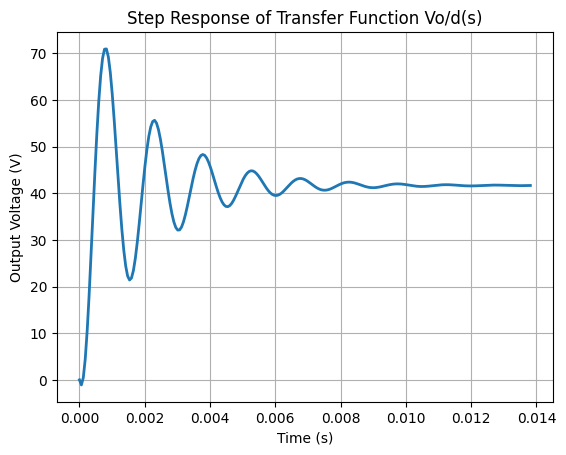

In [151]:
# Step Response
t, y = ctrl.step_response(TFb)   
plt.plot(t, y, linewidth=2)
plt.grid(True)
plt.title('Step Response of Transfer Function Vo/d(s)')
plt.xlabel('Time (s)')
plt.ylabel('Output Voltage (V)')
plt.show()

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


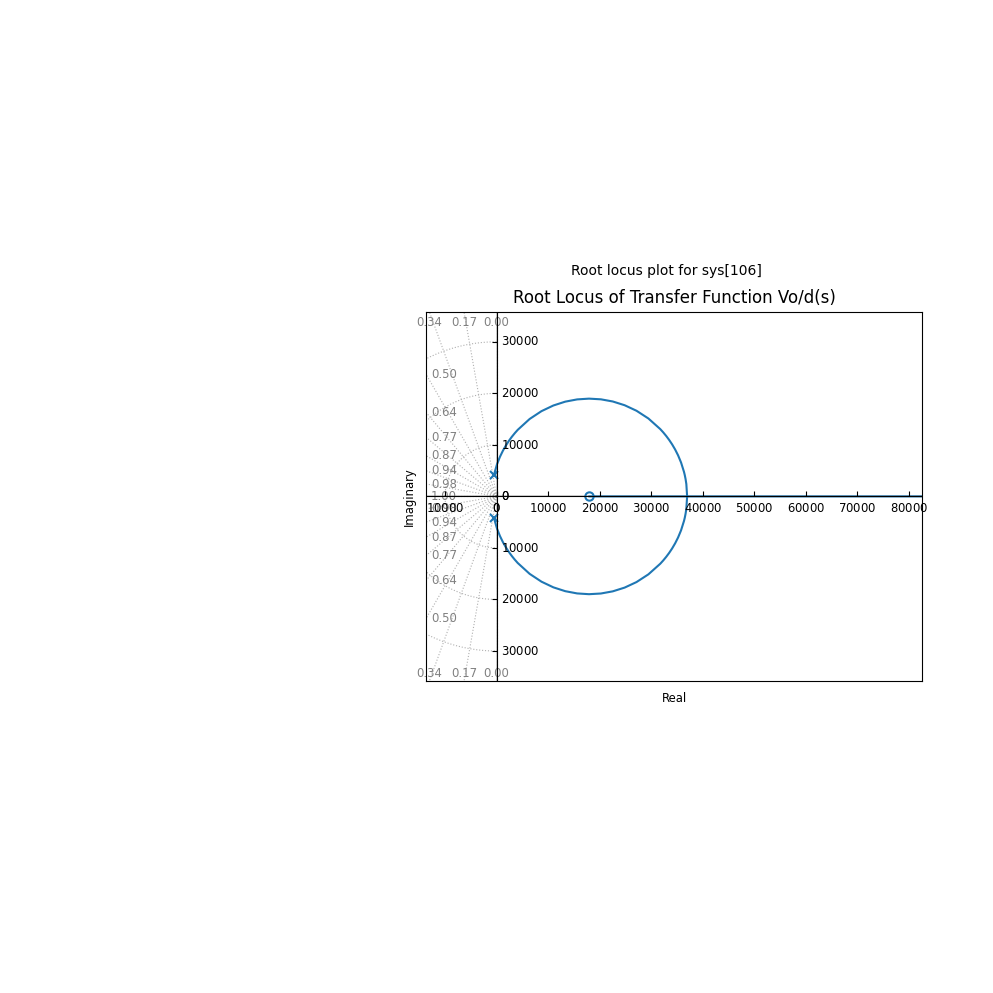

In [152]:
# Root-Locus
ctrl.rlocus(TFb)
plt.title('Root Locus of Transfer Function Vo/d(s)')
plt.grid(True)

Text(0.5, 0.98, 'Bode Plot of Transfer Function Vo/d(s)')

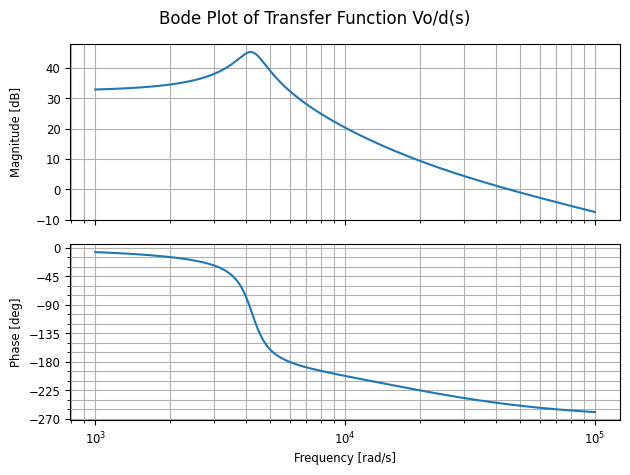

In [153]:
# Bode Plot
ctrl.bode(TFb, dB=True, grid=True)
plt.suptitle('Bode Plot of Transfer Function Vo/d(s)')

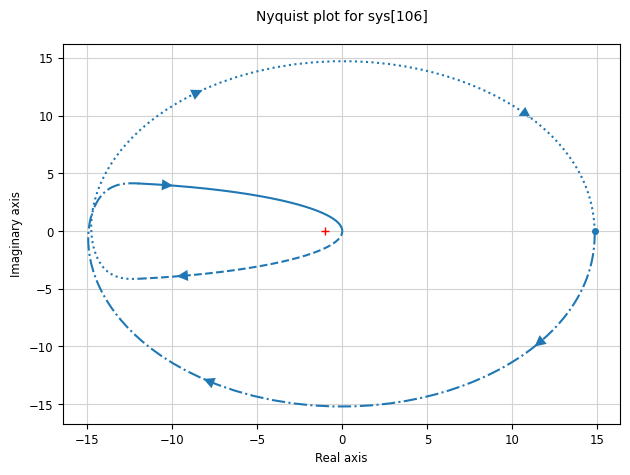

In [154]:
ctrl.nyquist(TFb)